In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Theodr8/DataScienceAOL/main/heart_disease_uci.csv')
df.head(5)

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [3]:
print(df.shape)
print()

print(df.columns)
print()

print(df.info())
print()


(920, 16)

Index(['id', 'age', 'sex', 'dataset', 'cp', 'trestbps', 'chol', 'fbs',
       'restecg', 'thalch', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: f

In [4]:
df.describe()

,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [5]:
df.describe(include=["object"])

,sex,dataset,cp,fbs,restecg,exang,slope,thal
count,920,920,920,830,918,865,611,434
unique,2,4,4,2,3,2,3,3
top,Male,Cleveland,asymptomatic,False,normal,False,flat,normal
freq,726,304,496,692,551,528,345,196


In [6]:
#data pasien yang memiliki kadar gula darah puasa lebih dari 120 mg/dl
df["fbs"].value_counts()

False    692
True     138
Name: fbs, dtype: int64

In [7]:
#data clean
print(df.isnull().sum())

#Menangani nilai kosong
#kolom numerik
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        mean_value = df[col].mean()
        df[col].fillna(mean_value, inplace=True)

#kolom kategorikal
categorical_cols = df.select_dtypes(include='object').columns.tolist()
for col in categorical_cols:
    if df[col].isnull().sum() > 0:
        mode_value = df[col].mode()[0]
        df[col].fillna(mode_value, inplace=True)

#memeriksa nilai kosong yang tersisa
remaining_missing_values = df.isnull().sum().sum()
if remaining_missing_values == 0:
    print("\nData Cleaned")
else:
    print(data.isnull().sum())

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

Data Cleaned


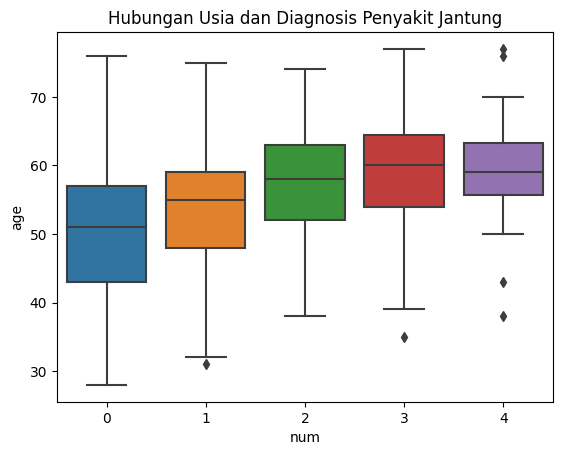

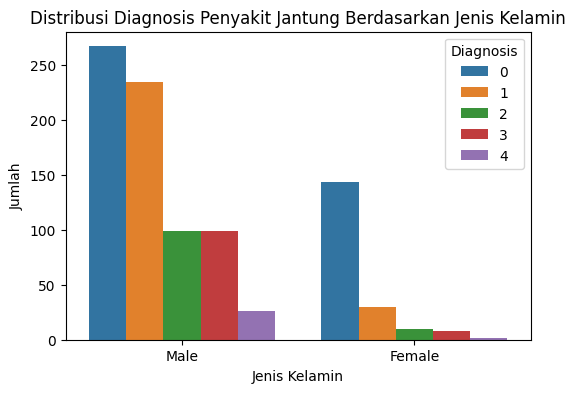

In [8]:
#Mengidentifikasi hubungan antara usia, jenis kelamin, dan kecenderungan terkena masalah jantung.
#Mencari korelasi antara usia dan diagnosis penyakit jantung
sns.boxplot(x='num', y='age', data=df)
plt.title('Hubungan Usia dan Diagnosis Penyakit Jantung')
plt.show()

#Mencari distribusi diagnosis penyakit jantung berdasarkan jenis kelamin
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', hue='num', data=df)
plt.title('Distribusi Diagnosis Penyakit Jantung Berdasarkan Jenis Kelamin')
plt.xlabel('Jenis Kelamin')
plt.ylabel('Jumlah')
plt.legend(title='Diagnosis', loc='upper right')
plt.show()

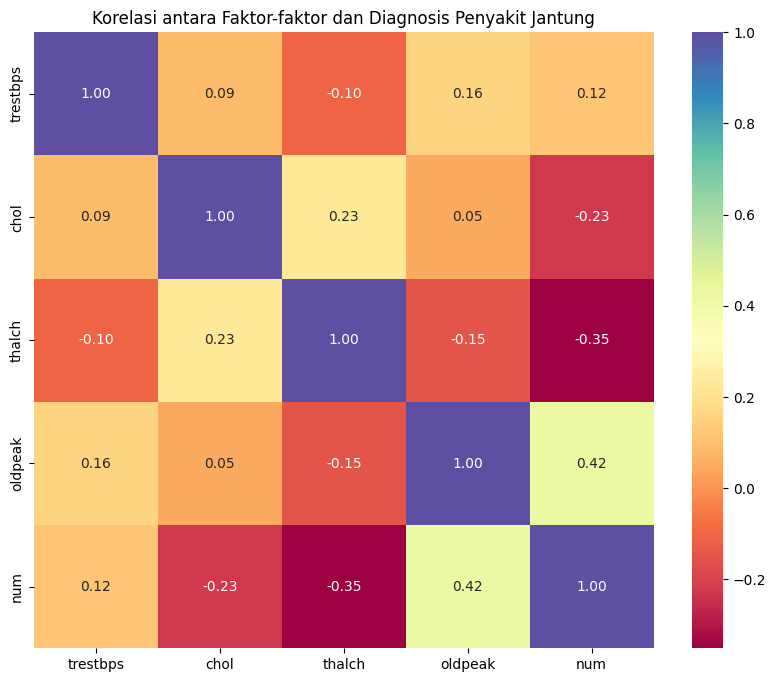

In [9]:
#Korelasi antara faktor-faktor seperti tekanan darah, kolesterol, detak jantung maksimum, depresi ST, dll., dengan diagnosis penyakit jantung
#Memilih kolom numerik yang ingin dilihat korelasinya dengan diagnosis ('num')
numerical_columns = ['trestbps', 'chol', 'thalch', 'oldpeak', 'num']

#Menghitung korelasi antar variabel numerik
correlation_matrix = df[numerical_columns].corr()

#Menampilkan heatmap korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Spectral', fmt=".2f")
plt.title('Korelasi antara Faktor-faktor dan Diagnosis Penyakit Jantung')
plt.show()

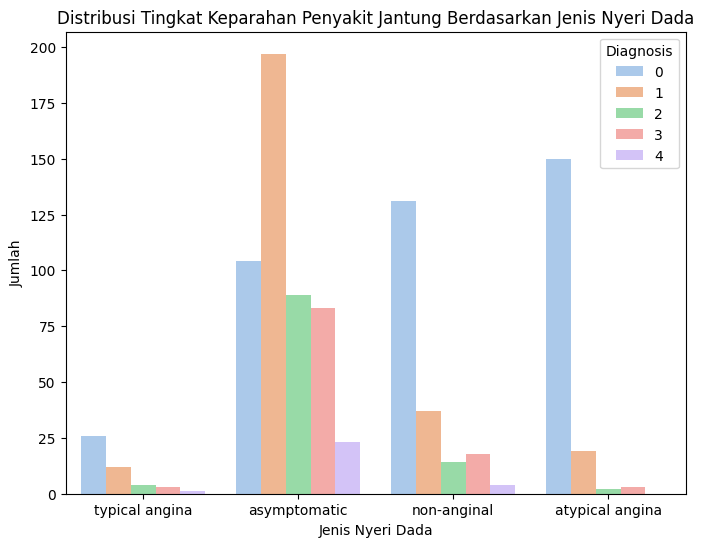

In [10]:
#Menampilkan distribusi tingkat keparahan penyakit jantung berdasarkan jenis nyeri dada
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', hue='num', data=df, palette='pastel')
plt.title('Distribusi Tingkat Keparahan Penyakit Jantung Berdasarkan Jenis Nyeri Dada')
plt.xlabel('Jenis Nyeri Dada')
plt.ylabel('Jumlah')
plt.legend(title='Diagnosis', loc='upper right')
plt.show()

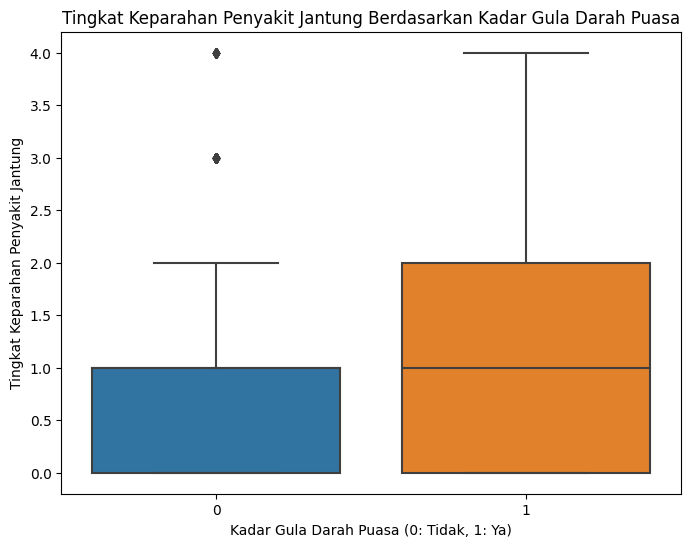

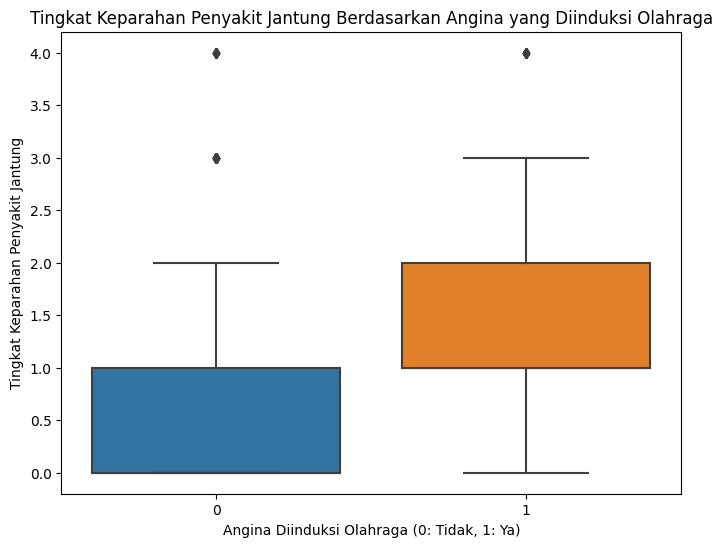

In [11]:
#Menganalisis faktor-faktor risiko seperti kadar gula darah puasa, riwayat angina yang diinduksi oleh olahraga, dan melihat sejauh mana faktor-faktor ini mempengaruhi kecenderungan terkena penyakit jantung
#Konversi kolom boolean menjadi numerik (0 dan 1)
df['fbs_numeric'] = df['fbs'].astype(int)
df['exang_numeric'] = df['exang'].astype(int)

#Menampilkan boxplot membandingkan tingkat keparahan penyakit jantung berdasarkan kadar gula darah puasa
plt.figure(figsize=(8, 6))
sns.boxplot(x='fbs_numeric', y='num', data=df)
plt.title('Tingkat Keparahan Penyakit Jantung Berdasarkan Kadar Gula Darah Puasa')
plt.xlabel('Kadar Gula Darah Puasa (0: Tidak, 1: Ya)')
plt.ylabel('Tingkat Keparahan Penyakit Jantung')
plt.show()

#Menampilkan boxplot membandingkan tingkat keparahan penyakit jantung berdasarkan angina yang diinduksi oleh olahraga
plt.figure(figsize=(8, 6))
sns.boxplot(x='exang_numeric', y='num', data=df)
plt.title('Tingkat Keparahan Penyakit Jantung Berdasarkan Angina yang Diinduksi Olahraga')
plt.xlabel('Angina Diinduksi Olahraga (0: Tidak, 1: Ya)')
plt.ylabel('Tingkat Keparahan Penyakit Jantung')
plt.show()

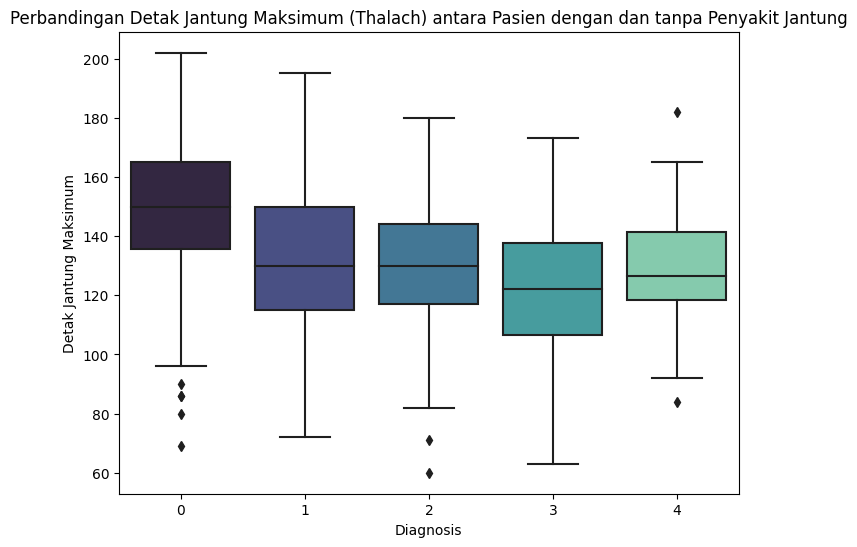

In [12]:
#Mengevaluasi efektivitas tes diagnostik tertentu seperti elektrokardiografi dalam mengidentifikasi masalah jantung
#Menampilkan boxplot untuk membandingkan hasil EKG antara pasien dengan dan tanpa diagnosis penyakit jantung
plt.figure(figsize=(8, 6))
sns.boxplot(x='num', y='thalch', data=df, palette = 'mako')
plt.title('Perbandingan Detak Jantung Maksimum (Thalach) antara Pasien dengan dan tanpa Penyakit Jantung')
plt.xlabel('Diagnosis')
plt.ylabel('Detak Jantung Maksimum')
plt.show()

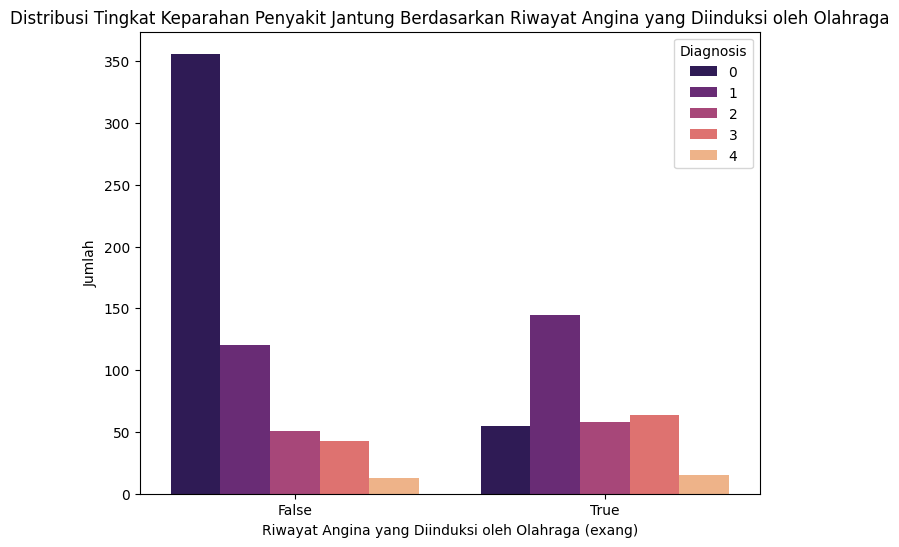

In [13]:
#Melihat kecenderungan perilaku tertentu seperti angina yang diinduksi oleh olahraga pada pasien tertentu dan bagaimana itu mempengaruhi tingkat keparahan penyakit
plt.figure(figsize=(8, 6))
sns.countplot(x='exang', hue='num', data=df, palette = 'magma')
plt.title('Distribusi Tingkat Keparahan Penyakit Jantung Berdasarkan Riwayat Angina yang Diinduksi oleh Olahraga')
plt.xlabel('Riwayat Angina yang Diinduksi oleh Olahraga (exang)')
plt.ylabel('Jumlah')
plt.legend(title='Diagnosis', loc='upper right')
plt.show()

In [14]:
#Mengambil nilai unik dari kolom "dataset"
datasets = df['dataset'].unique()
for dataset in datasets:
    print(dataset)

Cleveland
Hungary
Switzerland
VA Long Beach


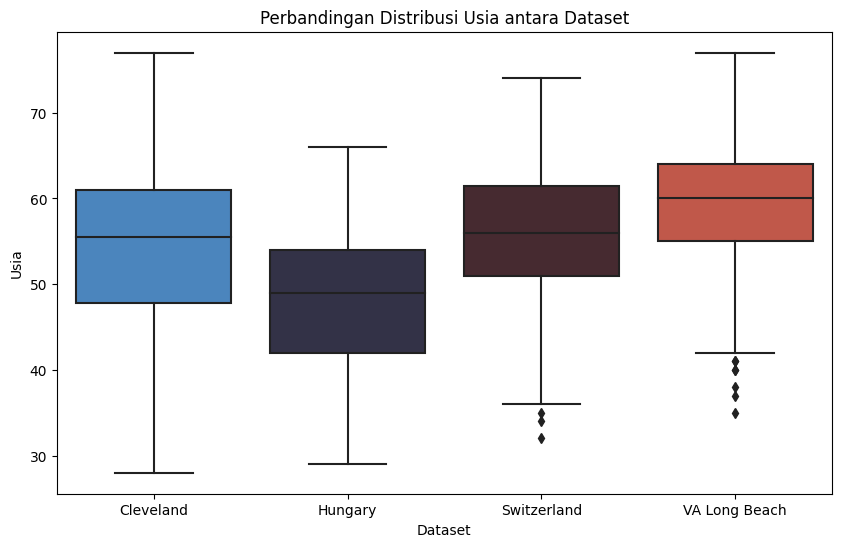

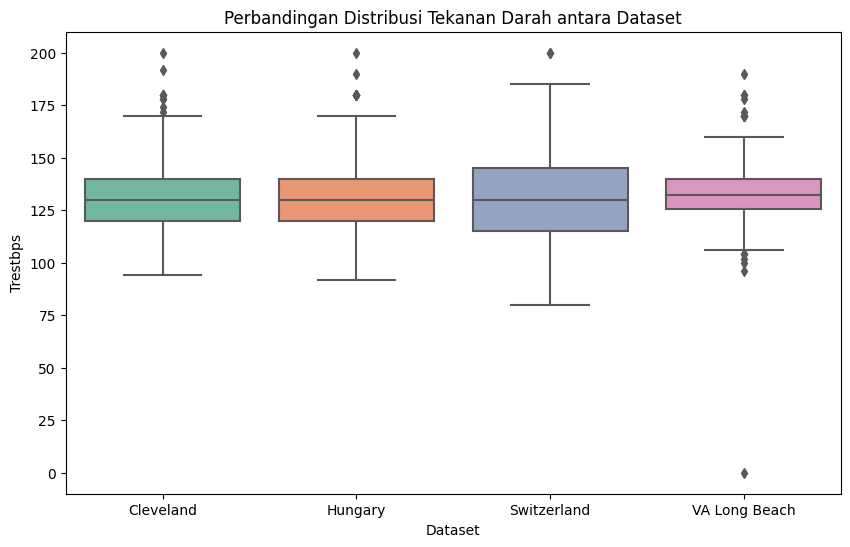

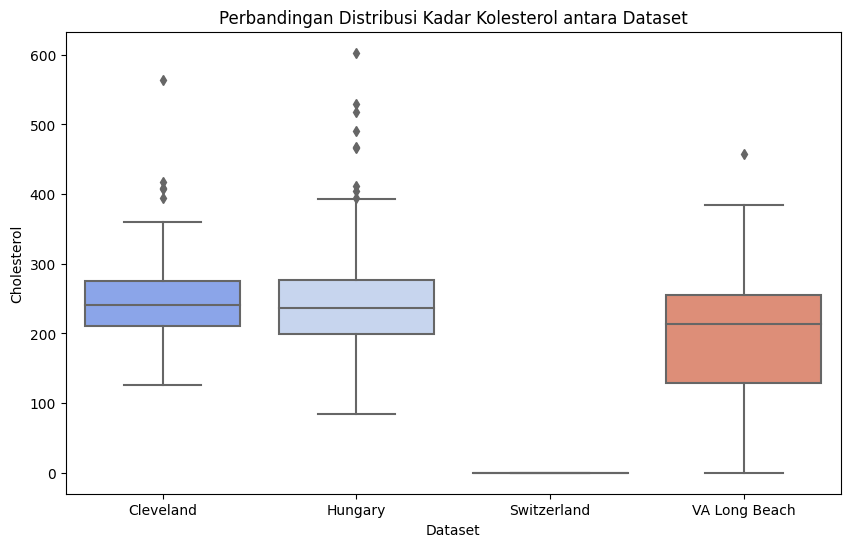

In [15]:
#Membandingkan karakteristik atau hasil antara dataset untuk melihat apakah ada perbedaan dalam pola atau tingkat penyakit jantung
#Memilih data berdasarkan dataset
data_cleveland = df[df['dataset'] == 'Cleveland']
data_hungary = df[df['dataset'] == 'Hungary']
data_switzerland = df[df['dataset'] == 'Switzerland']
data_VALongBeach = df[df['dataset'] == 'VA Long Beach']

#Membandingkan distribusi usia antara dataset
plt.figure(figsize=(10, 6))
sns.boxplot(x='dataset', y='age', data=df, palette = 'icefire')
plt.title('Perbandingan Distribusi Usia antara Dataset')
plt.xlabel('Dataset')
plt.ylabel('Usia')
plt.show()

#Membandingkan distribusi tekanan darah antara dataset
plt.figure(figsize=(10, 6))
sns.boxplot(x='dataset', y='trestbps', data=df, palette = 'Set2')
plt.title('Perbandingan Distribusi Tekanan Darah antara Dataset')
plt.xlabel('Dataset')
plt.ylabel('Trestbps')
plt.show()

#Membandingkan distribusi kadar kolesterol antara dataset
plt.figure(figsize=(10, 6))
sns.boxplot(x='dataset', y='chol', data=df, palette = 'coolwarm')
plt.title('Perbandingan Distribusi Kadar Kolesterol antara Dataset')
plt.xlabel('Dataset')
plt.ylabel('Cholesterol')
plt.show()

In [18]:
#library
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [19]:
#Membangun model prediktif untuk memprediksi risiko seseorang terkena penyakit jantung berdasarkan atribut-atribut yang ada dalam dataset
#Anggap 'num' kolom target
y_imputed = df['num']
X_imputed = df.drop('num', axis=1)

#Bagi data menjadi set latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

#Definisi transformer untuk fitur numerik dan kategorikal
fitur_numerik = X_imputed.select_dtypes(include=['int64', 'float64']).columns
fitur_kategorikal = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']

transformer_numerik = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

transformer_kategorikal = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

#Menggabungkan transformer menggunakan ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', transformer_numerik, fitur_numerik),
        ('cat', transformer_kategorikal, fitur_kategorikal)
    ])

#Menggabungkan preprocessor dengan classifier dalam pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))
])

#Membangun model randomforest
pipeline.fit(X_train, y_train)

#Lakukan prediksi
y_pred = pipeline.predict(X_test)

#Evaluasi model
akurasi = accuracy_score(y_test, y_pred)
print(f'Akurasi model: {akurasi}')

#Menampilkan laporan klasifikasi
#Precision: Jumlah prediksi positif yang benar (True Positive) dibagi #dengan total prediksi positif (True Positive + False Positive)
#Recall (Sensitivity): Jumlah prediksi positif yang benar (True Positive) dibagi|
#dengan total jumlah kelas positif (True Positive + False Negative)
#F1-score: Nilai rata-rata harmonik antara precision dan recall
#Support: Jumlah sampel dalam setiap kelas #Macro avg: rata-rata untuk seluruh kelas
#Weighted avg: rata-rata berdasarkan bobot jumlah sampel
print("\nLaporan Klasifikasi Random Forest:")
print(classification_report(y_test, y_pred))

print("\nMatriks Kebingungan Random Forest:")
print(confusion_matrix(y_test, y_pred))

Akurasi model: 0.6467391304347826

Laporan Klasifikasi Random Forest:
              precision    recall  f1-score   support

           0       0.77      0.95      0.85        75
           1       0.56      0.67      0.61        54
           2       0.50      0.20      0.29        25
           3       0.35      0.23      0.28        26
           4       1.00      0.25      0.40         4

    accuracy                           0.65       184
   macro avg       0.64      0.46      0.49       184
weighted avg       0.62      0.65      0.61       184


Matriks Kebingungan Random Forest:
[[71  3  1  0  0]
 [13 36  1  4  0]
 [ 5 10  5  5  0]
 [ 3 15  2  6  0]
 [ 0  0  1  2  1]]


In [ ]:
#Feature engineering

In [21]:
#New Features
#Kategori Usia
bins = [0, 18, 30, 50, 100]
labels = ['Remaja', 'Dewasa Muda', 'Dewasa', 'Lansia']
df['Kategori Usia'] = pd.cut(df['age'], bins=bins, labels=labels)


#Menghitung rasio kolesterol terhadap tekanan darah
df['Rasio Chol/Trestbps'] = df['chol'] / df['trestbps']

#Hitung Heart Risk Index
df['Heart Risk Index'] = df['thalch'] * df['oldpeak'] / df['trestbps']

#Tampilkan fitur-fitur baru yang telah dibuat
print(df[['Kategori Usia', 'Rasio Chol/Trestbps', 'Heart Risk Index']].head())


  Kategori Usia  Rasio Chol/Trestbps  Heart Risk Index
0        Lansia             1.606897          2.379310
1        Lansia             1.787500          1.012500
2        Lansia             1.908333          2.795000
3        Dewasa             1.923077          5.034615
4        Dewasa             1.569231          1.852308


In [22]:
#Encoding Variabel
#Daftar kolom kategorikal yang perlu di-encode
categorical_cols = ['sex', 'dataset', 'cp', 'slope', 'thal']  # Ganti dengan kolom-kolom Anda

#Melakukan one-hot encoding untuk setiap kolom kategorikal
for col in categorical_cols:
    col_encoded = pd.get_dummies(df[col], prefix=col)
    dataset = pd.concat([df, col_encoded], axis=1)
    dataset.drop(col, axis=1, inplace=True)  # Menghapus kolom kategorikal yang lama setelah encoding

print(dataset.head())  # Tampilkan dataset setelah encoding

   id  age     sex    dataset               cp  trestbps   chol    fbs  \
0   1   63    Male  Cleveland   typical angina     145.0  233.0   True   
1   2   67    Male  Cleveland     asymptomatic     160.0  286.0  False   
2   3   67    Male  Cleveland     asymptomatic     120.0  229.0  False   
3   4   37    Male  Cleveland      non-anginal     130.0  250.0  False   
4   5   41  Female  Cleveland  atypical angina     130.0  204.0  False   

          restecg  thalch  ...   ca  num fbs_numeric  exang_numeric  \
0  lv hypertrophy   150.0  ...  0.0    0           1              0   
1  lv hypertrophy   108.0  ...  3.0    2           0              1   
2  lv hypertrophy   129.0  ...  2.0    1           0              1   
3          normal   187.0  ...  0.0    0           0              0   
4  lv hypertrophy   172.0  ...  0.0    0           0              0   

   Kategori Usia  Rasio Chol/Trestbps  Heart Risk Index thal_fixed defect  \
0         Lansia             1.606897          2.37

In [23]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

In [24]:
#Fitur-fitur numerik yang ingin di-scaling
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak']

#Standarisasi menggunakan StandardScaler
scaler = StandardScaler()
dataset[numeric_cols] = scaler.fit_transform(dataset[numeric_cols])

#MinMaxScaler
#scaler = MinMaxScaler()
#dataset[numeric_cols] = scaler.fit_transform(dataset[numeric_cols])

print(dataset.head())

   id       age     sex    dataset               cp  trestbps      chol  \
0   1  1.007386    Male  Cleveland   typical angina  0.698041  0.311021   
1   2  1.432034    Male  Cleveland     asymptomatic  1.511761  0.797713   
2   3  1.432034    Male  Cleveland     asymptomatic -0.658158  0.274289   
3   4 -1.752828    Male  Cleveland      non-anginal -0.115679  0.467130   
4   5 -1.328180  Female  Cleveland  atypical angina -0.115679  0.044717   

     fbs         restecg    thalch  ...   ca  num fbs_numeric  exang_numeric  \
0   True  lv hypertrophy  0.495698  ...  0.0    0           1              0   
1  False  lv hypertrophy -1.175955  ...  3.0    2           0              1   
2  False  lv hypertrophy -0.340128  ...  2.0    1           0              1   
3  False          normal  1.968345  ...  0.0    0           0              0   
4  False  lv hypertrophy  1.371326  ...  0.0    0           0              0   

   Kategori Usia  Rasio Chol/Trestbps  Heart Risk Index thal_fixed d

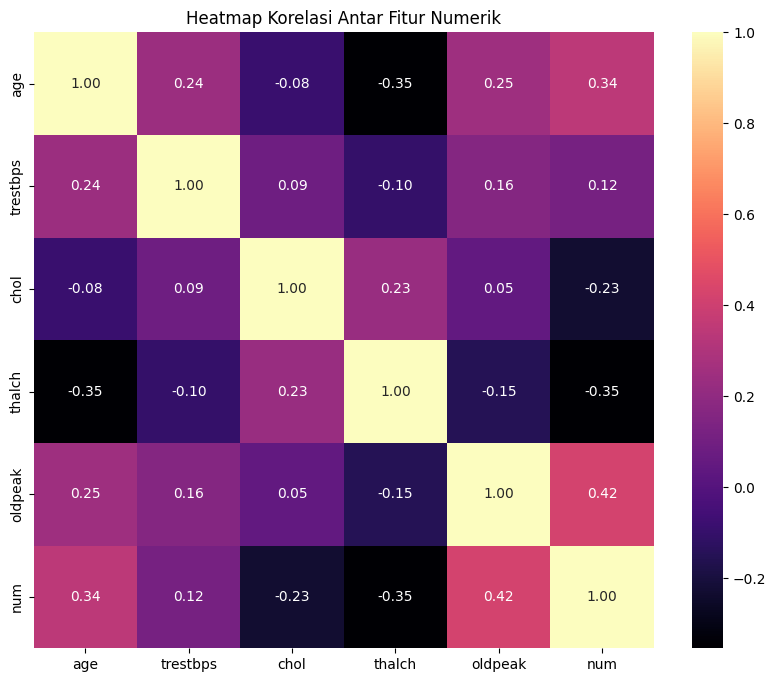


num                    1.000000
oldpeak                0.421907
Heart Risk Index       0.366274
exang                  0.350567
exang_numeric          0.350567
age                    0.339596
ca                     0.321404
id                     0.273552
fbs                    0.129539
fbs_numeric            0.129539
trestbps               0.116225
chol                  -0.228238
Rasio Chol/Trestbps   -0.256745
thalch                -0.351055
Name: num, dtype: float64


<ipython-input-25-4df803b99a69>:14: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_target = df.corr()['num'].sort_values(ascending=False)


In [25]:
#Features selection
#Hitung matriks korelasi antar fitur numerik
numeric_cols = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak', 'num']
numeric_data = df[numeric_cols]
correlation_matrix = numeric_data.corr()

# Plot heatmap dari matriks korelasi
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='magma', fmt=".2f")
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()

# Korelasi antara fitur dengan target ('num')
correlation_with_target = df.corr()['num'].sort_values(ascending=False)
print()
print(correlation_with_target)